0.00210139976829 0.628318530718


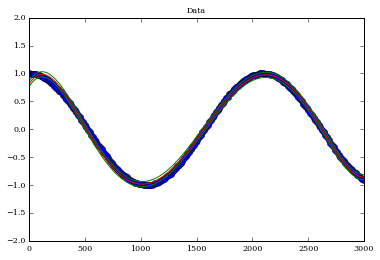

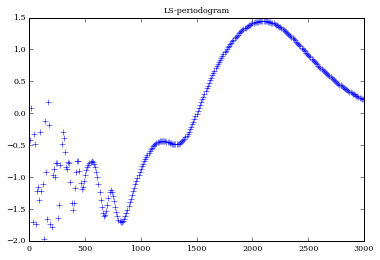

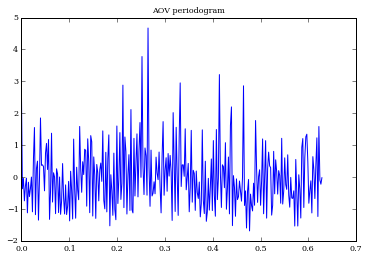

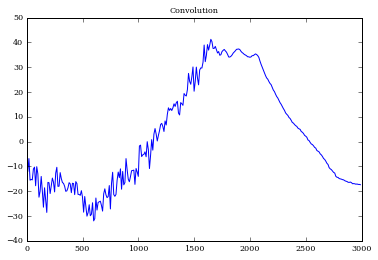

In [135]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from astroML.time_series import\
    lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap
import pyaov


#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)


x = np.linspace(0, 3000, num=200, endpoint=True)
y = np.cos(x*0.003)
for i in range(len(y)):
    r = np.random.random()
    if r < 0.5:
        y[i] -= 0.005*np.random.random()
    else:
        y[i] += 0.005*np.random.random()

period = np.array([i for i in range(10,3000,10)])
omega = 2 * np.pi / period
yerr = np.array([np.random.random()/2 for i in y])

PS = lomb_scargle(x, y, yerr, omega, generalized=True)

p = np.poly1d(np.polyfit(x,y,5))
xp = np.arange(0,3000,1)

#calculate y difference
dy = []
for i in range(len(y)):
    dy.append(abs(y[i]-p(x[i])))
    if dy[i] < yerr[i]:
        dy[i] = 0
    else:
        dy[i] -= yerr[i]
        
S=y-p(x)
sigma=0.0
for i in range(len(y)):
    sigma+=S[i]**2
sigma=sigma/len(y)
sigma=np.sqrt(sigma)

indicator=[1]*len(y)
for i in range(len(y)):
    if 5*sigma < abs(y[i]-p(x[i])):
        indicator[i]-=1

new_x=indicator*x
new_y=indicator*y

#aov calculation
th,fr,frmax=pyaov.aovw(x,y,yerr,omega[0],omega[-1])
print omega[-1], omega[0]
#normalize periodgram
PS = (PS - np.mean(PS))/np.std(PS)
th = (th - np.mean(th))/np.std(th)

#plot data
plt.figure(1)
plt.title("Data")
plt.plot(new_x, new_y, 'o',xp,p(xp),'r-',xp,p(xp)+sigma,'g-',xp,p(xp)-sigma,'g-')
plt.ylim((-2,2))

#plot LS-periodogram
plt.figure(2)
plt.title("LS-periodogram")
plt.plot(period,PS,'+')

#plot AOV periodogram
plt.figure(3)
plt.title("AOV periodogram")
plt.plot(fr,th)

#plot convolution
plt.figure(4)
plt.title("Convolution")
#plt.plot(period,PS*th[:299])

#plt.figure(5)
plt.plot(period,np.convolve(PS,th[:299],mode='same'))
#pyaov.plper(frmax,x,y,fr,th)

#plt.subplots_adjust(left=0,top=1,right=1,bottom=0)

plt.show()